In [1]:
import numpy as np
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
def get_data(filename):
    with open(filename) as f:
        raw_data = np.genfromtxt(StringIO(f.read()), delimiter="\t")
    label = raw_data[:,0:2].astype(int)
    data = raw_data[:,2:]
    return data, label

In [3]:
def pca(data):
    data_adjust = data - np.mean(data, axis=0)
    w, v = np.linalg.eig(np.cov(data_adjust.T))
    return data_adjust.dot(v[np.argsort(w)[-2:]].T)

In [4]:
def get_centers_bank(data, k, seed=41):
    init_centers = data[np.random.RandomState(seed=seed).permutation(data.shape[0])[0:k]]
    centers_bank = [[[center, np.array([])] for center in init_centers]]
    itr = 1
    while True:
        if(itr % 5 == 0):
            print("itr:", itr)
        dis_matrix = np.empty((0,data.shape[0]))
        for row in centers_bank[-1]:
            dis_matrix = np.vstack((dis_matrix, np.sum(np.square(data - row[0]), axis=1)))
        belongs = np.argmin(dis_matrix, axis=0)
        centers = []
        check_same = True
        for i in range(k):
            index = np.where(belongs == i)[0]
            centers_bank[-1][i][1] = index
            center = np.mean(data[index],axis=0)
            check_same  = check_same and np.all(center == centers_bank[-1][i][0])
            centers.append([center, np.array([])])
        if check_same == True:
            break
        centers_bank.append(centers)
        itr += 1
    print("total itr:",itr)
    return centers_bank

In [5]:
def get_centers(centers_bank, itr=-1):
    centers_matrix = np.empty((0,data.shape[1]))
    for row in centers_bank[itr]:
        centers_matrix = np.vstack((centers_matrix, row[0]))
    return centers_matrix

##  Test

#### PCA before k-mean

In [6]:
def plot_data(data, centers):
    label_set = set(np.arange(len(centers)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label][1]
        plt.scatter(data[index][:,0], data[index][:,1], s=20, c=color_map[label],
                    alpha=0.3, label=label)
        plt.scatter(centers[label][0][0], centers[label][0][1], s=100, c=color_map[label],
                    alpha=1.0, marker='x')
    plt.title("pca")
    plt.legend(loc='best')
    plt.show()
    plt.close()

itr: 5
itr: 10
total itr: 14


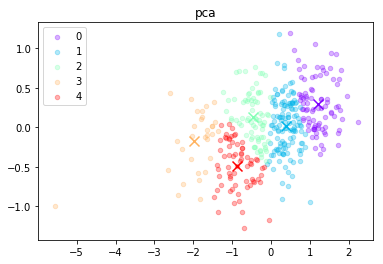

In [7]:
data, labels = get_data("../data/cho.txt")
k = 5
data_pca = pca(data)
centers_bank = get_centers_bank(data_pca, k,50)
plot_data(data_pca,centers_bank[-1])

itr: 5
itr: 10
itr: 15
itr: 20
itr: 25
total itr: 25


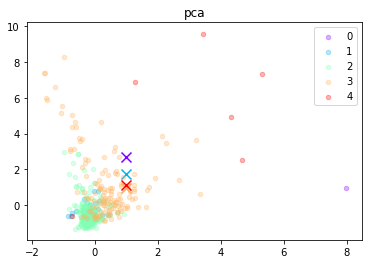

In [15]:
data, labels = get_data("../data/iyer.txt")
k = 5
data_pca = pca(data)
centers_bank = get_centers_bank(data, k,60)
plot_data(data_pca,centers_bank[-1])

#### PCA after K-min

In [137]:
def plot_data(data_pca, centers_pca, centers):
    label_set = set(np.arange(len(centers_pca)))
    color_map = dict(zip(label_set, cm.rainbow(np.linspace(0, 1, len(label_set)))))
    for label in label_set:
        index = centers[label][1]
        plt.scatter(data_pca[index][:,0], data_pca[index][:,1], s=20, c=color_map[label],
                    alpha=0.1, label=label)
        plt.scatter(centers_pca[label][0], centers_pca[label][1], s=100, c=color_map[label],
                    alpha=0.8, marker='x')
    plt.title("pca")
    plt.legend(loc='best')
    plt.show()
    plt.close()

In [138]:
def plot_itr(data, centers_bank, itr=-1):
    data_pca = data.copy()
    for row in centers_bank[itr]:
        data_pca = np.vstack((data_pca, row[0]))
    pca_data = pca(data_pca)
    pca_centers = pca_data[-k:]
    pca_data = pca_data[0:-k]
    plot_data(pca_data, pca_centers, centers_bank[itr])

In [139]:
"""
The plot image will change because I combine centers with data to do pca
"""
data, labels = get_data("../data/cho.txt")
k = 5
centers_bank = get_centers_bank(data, k)
#pca_data = pca(data)
#pca_centers = pca(get_centers(centers_bank, -1))
#plot_data(pca_data, pca_centers, centers_bank[-1])
#plot_itr(data, centers_bank,5)

itr: 5
itr: 10
total itr: 12


itr: 5
itr: 10
itr: 15
itr: 20
total itr: 20


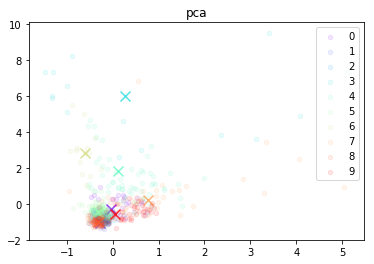

In [142]:
data, labels = get_data("../data/iyer.txt")
k = 10
centers_bank = get_centers_bank(data, k)
plot_itr(data, centers_bank,1)

### Test

In [40]:
from sklearn import datasets as ds

In [42]:
def generate_circle():
    # generate data
    X,c = ds.make_circles(n_samples=1000, factor=.5,noise=.05)
    return X

In [38]:
def generate_data():
    sigma = np.array([[0.2,0],[0,0.2]])
    n = 100
    mu1 = np.array([1,1])
    mu2 = np.array([3,4])
    mu3 = np.array([4,9])
    mu4 = np.array([1,8])
    x11 = np.random.multivariate_normal(mu1,sigma,n)
    x15 = np.random.multivariate_normal(mu2,sigma,n)
    x51 = np.random.multivariate_normal(mu3,sigma,n)
    x55 = np.random.multivariate_normal(mu4,sigma,n)
    X = np.vstack([x11,x15,x51,x55])  
    return X

In [47]:
X = generate_circle()

itr: 5
itr: 10
itr: 15
total itr: 16


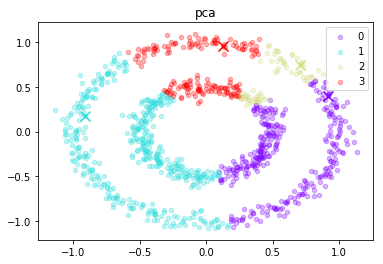

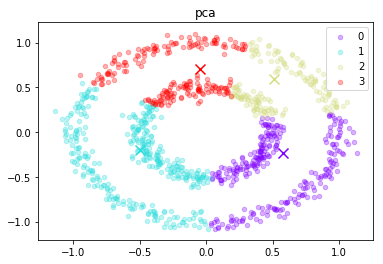

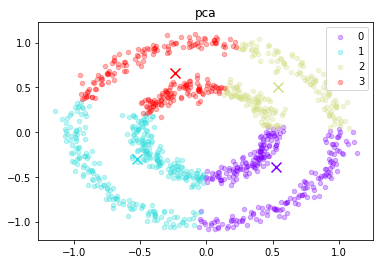

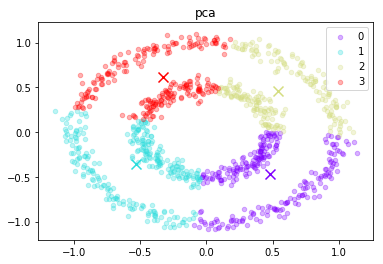

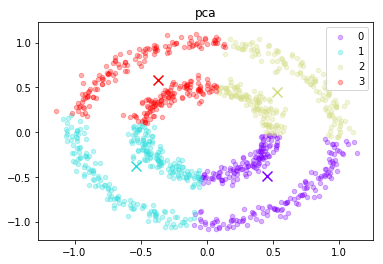

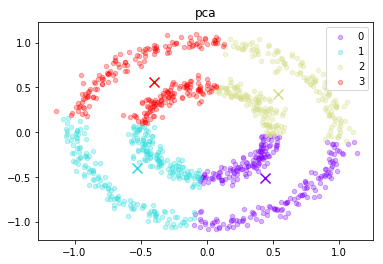

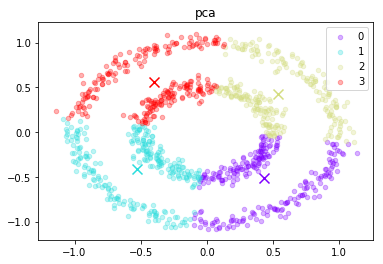

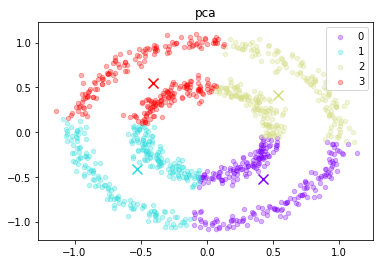

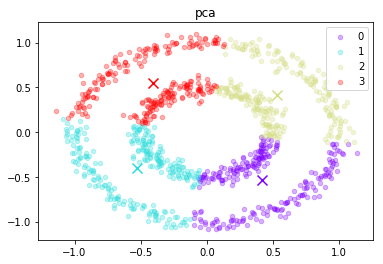

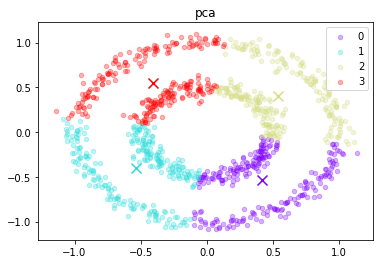

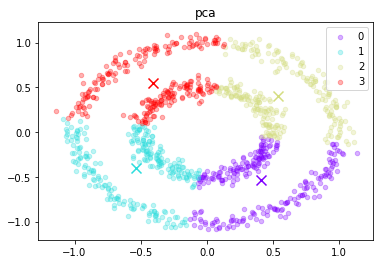

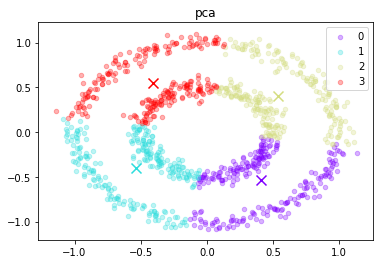

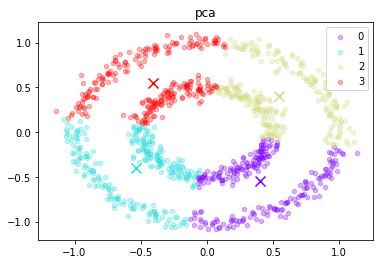

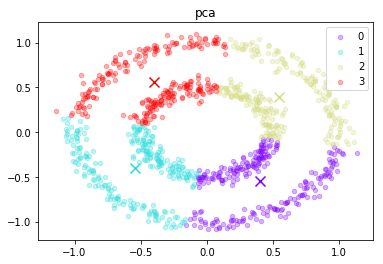

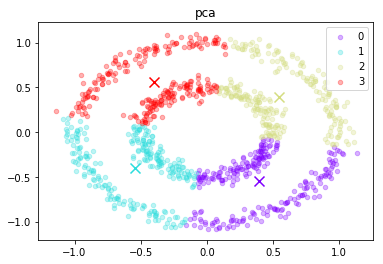

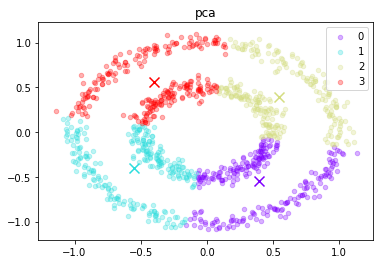

In [53]:
#X = generate_data()
X = generate_circle()
k = 4
centers_bank = get_centers_bank(X, k, 20)
for i in range(len(centers_bank)):
    plot_data(X,centers_bank[i])

In [63]:
def euclidean_distance(pt1, pt2):
    return np.sqrt(np.sum(np.square(pt1 - pt2)))

In [74]:
euclidean_distance(X[2],X[141])

0.057111435288514846

In [56]:
centers_bank[1][1]

[array([-0.50165282, -0.20556811]),
 array([  2,   6,   8,   9,  10,  11,  16,  19,  22,  24,  26,  30,  36,
         40,  43,  45,  46,  49,  50,  51,  53,  58,  59,  60,  68,  69,
         72,  73,  76,  77,  85,  87,  88,  89,  99, 102, 103, 107, 110,
        112, 113, 114, 117, 120, 123, 125, 128, 131, 132, 135, 137, 140,
        141, 153, 158, 163, 164, 167, 176, 188, 189, 193, 194, 197, 198,
        199, 203, 204, 222, 223, 228, 229, 232, 243, 246, 248, 251, 262,
        269, 270, 271, 273, 274, 278, 279, 284, 285, 291, 292, 293, 294,
        299, 300, 301, 303, 305, 306, 311, 313, 315, 318, 320, 321, 331,
        334, 335, 336, 339, 341, 344, 351, 354, 356, 358, 360, 361, 362,
        363, 366, 369, 370, 372, 375, 378, 380, 381, 382, 384, 385, 386,
        387, 390, 393, 395, 397, 398, 401, 404, 405, 407, 411, 413, 414,
        415, 419, 421, 423, 429, 430, 441, 442, 444, 449, 453, 456, 458,
        460, 462, 463, 464, 468, 469, 471, 474, 484, 486, 487, 488, 489,
        493, 49